# Hst 6. Analyse van 2 variabelen: visualisatie


Wanneer je het verband tussen twee variabelen wil visualiseren, dan hangt het meest geschikte grafiektype af van het meetniveau van enerzijds de onafhankelijke en anderzijds de afhankelijke variabele.

Je vindt deze in de tabel hieronder:

| Onafhankelijke | Afhankelijke | Grafiektype                             |
| :---           | :---         | :---                                    |
| Kwalitatief    | Kwalitatief  | mozaïekdiagram                          |
|                |              | geclusterde staafgrafiek                |
|                |              | rependiagram                            |
| Kwalitatief    | Kwantitatief | boxplot                                 |
|                |              | densiteitsplot                          |
|                |              | (staafgrafiek gemiddelde + error bars)  |
| Kwantitatief   | Kwantitatief | spreidings/XY-grafiek                   |


In [1]:
# Importeren van de nodige packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basis visualisatie
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram
import seaborn as sns                               # Geavanceerde datavisualisatie
import altair as alt                                # Een alternatief visualisatiesysteem


# Kwalitatief - kwalitatief

We gebruiken als voorbeeld de dataset `mpg` (informatie over het verbruik van een in de VS populaire automodellen). Deze dataset wordt meegeleverd met R, een ander softwarepakket voor data-analyse en -visualisatie (de grote concurrent van Python). Je kan deze en andere datasets vinden op <http://vincentarelbundock.github.io/Rdatasets/>.


In [2]:
mpg = pd.read_csv("datasets/mpg.csv")
mpg.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Stel dat we willen weten of er een verband is tussen het type aandrijving (`drv`, de onafhankelijke variabele) en het brandstoftype (`fl`, de afhankelijke variabele). Met andere woorden, we willen weten of het gebruikte brandstoftype tussen de verschillende types aandrijvingen significant verschillend is.

Hieronder is de kruistabel getoond met de onafhankelijke variabele in de kolommen (2e parameter), de afhankelijke in de rijen (1e parameter). Ook de marginale totalen zijn toegevoegd. Als er geen verband is tussen beide variabelen, zullen de onderlinge verhoudingen in elke kolomm ongeveer gelijk zijn.

In [3]:
pd.crosstab(mpg["fl"], mpg["drv"], margins=True, margins_name="Totaal")

drv,4,f,r,Totaal
fl,,,,
c,0,1,0,1
d,2,3,0,5
e,6,1,1,8
p,20,25,7,52
r,75,76,17,168
Totaal,103,106,25,234




Ter info: de betekenis van de afkortingen:

- `drv`
    - `f`: voorwielaandrijving
    - `r`: achterwielaandrijving
    - `4`: vierwielaandrijving
- `fl`
    - `c`: aardgas, Compressed Natural Gas (CNG)
    - `d`: diesel
    - `e`: elektrisch
    - `p`: "premium" benzine
    - `r`: "regular" benzine

## Geclusterde staafgrafiek

Bij een geclusterde staafgrafiek wordt de onafhankelijke variabele typisch uitgezet op de x-as. Op de y-as worden staven getekend die de frequenties in de afhankelijke variabele voorstellen, naast elkaar. Als het aantal categorieën groter wordt, wordt dit soort grafiek al snel onduidelijk.


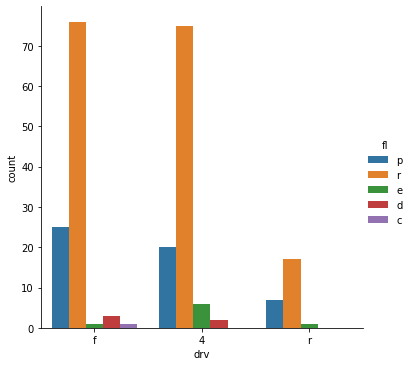

In [4]:
sns.catplot(data=mpg, hue="fl", x="drv", kind="count")

## Rependiagram

Een rependiagram is eveneens gebaseerd op een staafdiagram, maar hier worden de staven gestapeld en genormaliseerd.

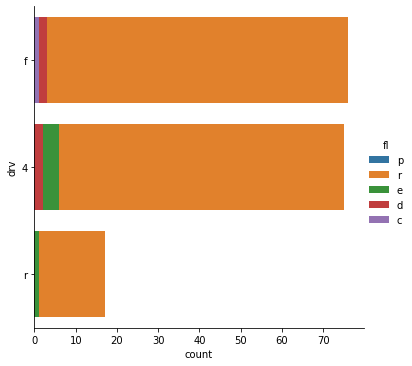

In [5]:
sns.catplot(data=mpg, hue="fl", y="drv", kind="count", dodge=False)